C:\Users\Hp\AppData\Local\Temp/ipykernel_12948/4036009613.py:6: UserWarning: viewer requires Qt
  import skimage.viewer


-1

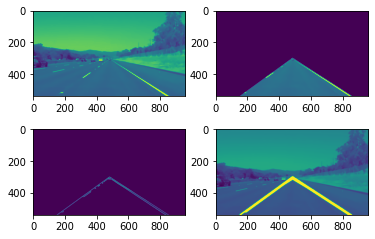

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.feature
import skimage.viewer
iamge = cv2.imread(r"C:\Users\Hp\Downloads\red.jpg")
img_gray = cv2.cvtColor(iamge, cv2.COLOR_BGR2GRAY)
dst = cv2.fastNlMeansDenoising(img_gray,None,10,7,21)
plt.subplot(2,2,1)
plt.imshow(dst)
cv2.waitKey()
height = dst.shape[0]
width = dst.shape[1]
vertices = [(150,height),(width/2,300),(850,height)]
def masking(img,points):
    mask = np.zeros(img.shape, dtype=np.uint8)
    mask = cv2.fillPoly(mask,points,255)
    result = cv2.bitwise_and(img, mask)
    return result
masked = masking(dst,np.array([vertices],np.int32))
plt.subplot(2,2,2)
plt.imshow(masked)
cv2.waitKey()
canny = cv2.Canny(masked,100,150)
plt.subplot(2,2,3)
plt.imshow(canny)
cv2.waitKey()
def draw_hough_lines(image,lines):
    image = np.copy(image)
    blank_image = np.zeros((image.shape[0],image.shape[1]),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,0,255),thickness=10)
    image = cv2.addWeighted(image,0.8,blank_image,1,0.0)
    return image
line = cv2.HoughLinesP(canny,rho=6,threshold=60,theta=np.pi/180,minLineLength=50,maxLineGap=150,lines=np.array([]))
final = draw_hough_lines(dst,line)
plt.subplot(2,2,4)
plt.imshow(final)
cv2.waitKey()